# Feature Engineering

In [1]:
import pandas as pd

train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

train_df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


## Create New Features
In this section, we will create new features to improve the model's performance and gain more insights from the data. We will create interaction features, polynomial features, and apply transformations to existing features.

In [2]:
import numpy as np

# Interaction Features
train_df['Energy_Mood_Interaction'] = train_df['Energy'] * train_df['MoodScore']
test_df['Energy_Mood_Interaction'] = test_df['Energy'] * test_df['MoodScore']

train_df['Rhythm_Energy_Interaction'] = train_df['RhythmScore'] * train_df['Energy']
test_df['Rhythm_Energy_Interaction'] = test_df['RhythmScore'] * test_df['Energy']

train_df['Loudness_Energy_Interaction'] = train_df['AudioLoudness'] * train_df['Energy']
test_df['Loudness_Energy_Interaction'] = test_df['AudioLoudness'] * test_df['Energy']

train_df['Rhythm_Loudness_Interaction'] = train_df['RhythmScore'] * train_df['AudioLoudness']
test_df['Rhythm_Loudness_Interaction'] = test_df['RhythmScore'] * test_df['AudioLoudness']

# Polynomial Features
train_df['Energy_sq'] = train_df['Energy']**2
test_df['Energy_sq'] = test_df['Energy']**2

train_df['MoodScore_sq'] = train_df['MoodScore']**2
test_df['MoodScore_sq'] = test_df['MoodScore']**2

train_df['RhythmScore_sq'] = train_df['RhythmScore']**2
test_df['RhythmScore_sq'] = test_df['RhythmScore']**2

train_df['AudioLoudness_sq'] = train_df['AudioLoudness']**2
test_df['AudioLoudness_sq'] = test_df['AudioLoudness']**2

# Feature Transformations
train_df['TrackDurationMs_log'] = np.log1p(train_df['TrackDurationMs'])
test_df['TrackDurationMs_log'] = np.log1p(test_df['TrackDurationMs'])

# Ratio Features
train_df['Vocal_Duration_Ratio'] = train_df['VocalContent'] / train_df['TrackDurationMs']
test_df['Vocal_Duration_Ratio'] = test_df['VocalContent'] / test_df['TrackDurationMs']


train_df.head()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,...,Energy_Mood_Interaction,Rhythm_Energy_Interaction,Loudness_Energy_Interaction,Rhythm_Loudness_Interaction,Energy_sq,MoodScore_sq,RhythmScore_sq,AudioLoudness_sq,TrackDurationMs_log,Vocal_Duration_Ratio
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,...,0.338659,0.498743,-6.310151,-4.609732,0.682717,0.167990,0.364345,58.322884,12.580104,8.083500e-08
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,...,0.094657,0.092976,-2.365309,-10.402336,0.021141,0.423814,0.408898,264.634753,12.010791,4.347174e-07
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,...,0.264774,0.321415,-9.965667,-8.208718,0.390208,0.179662,0.264749,254.516559,12.069660,6.344832e-07
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,...,0.135879,0.358026,-0.661492,-0.996666,0.237624,0.077699,0.539435,1.841449,12.326379,2.348061e-07
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,...,0.452607,0.504899,-12.368798,-6.958670,0.897440,0.228263,0.284055,170.470560,12.273552,1.098333e-07


## Evaluate New Features
In this section, we will evaluate the new features by analyzing their correlation with the target variable and their importance in a machine learning model.

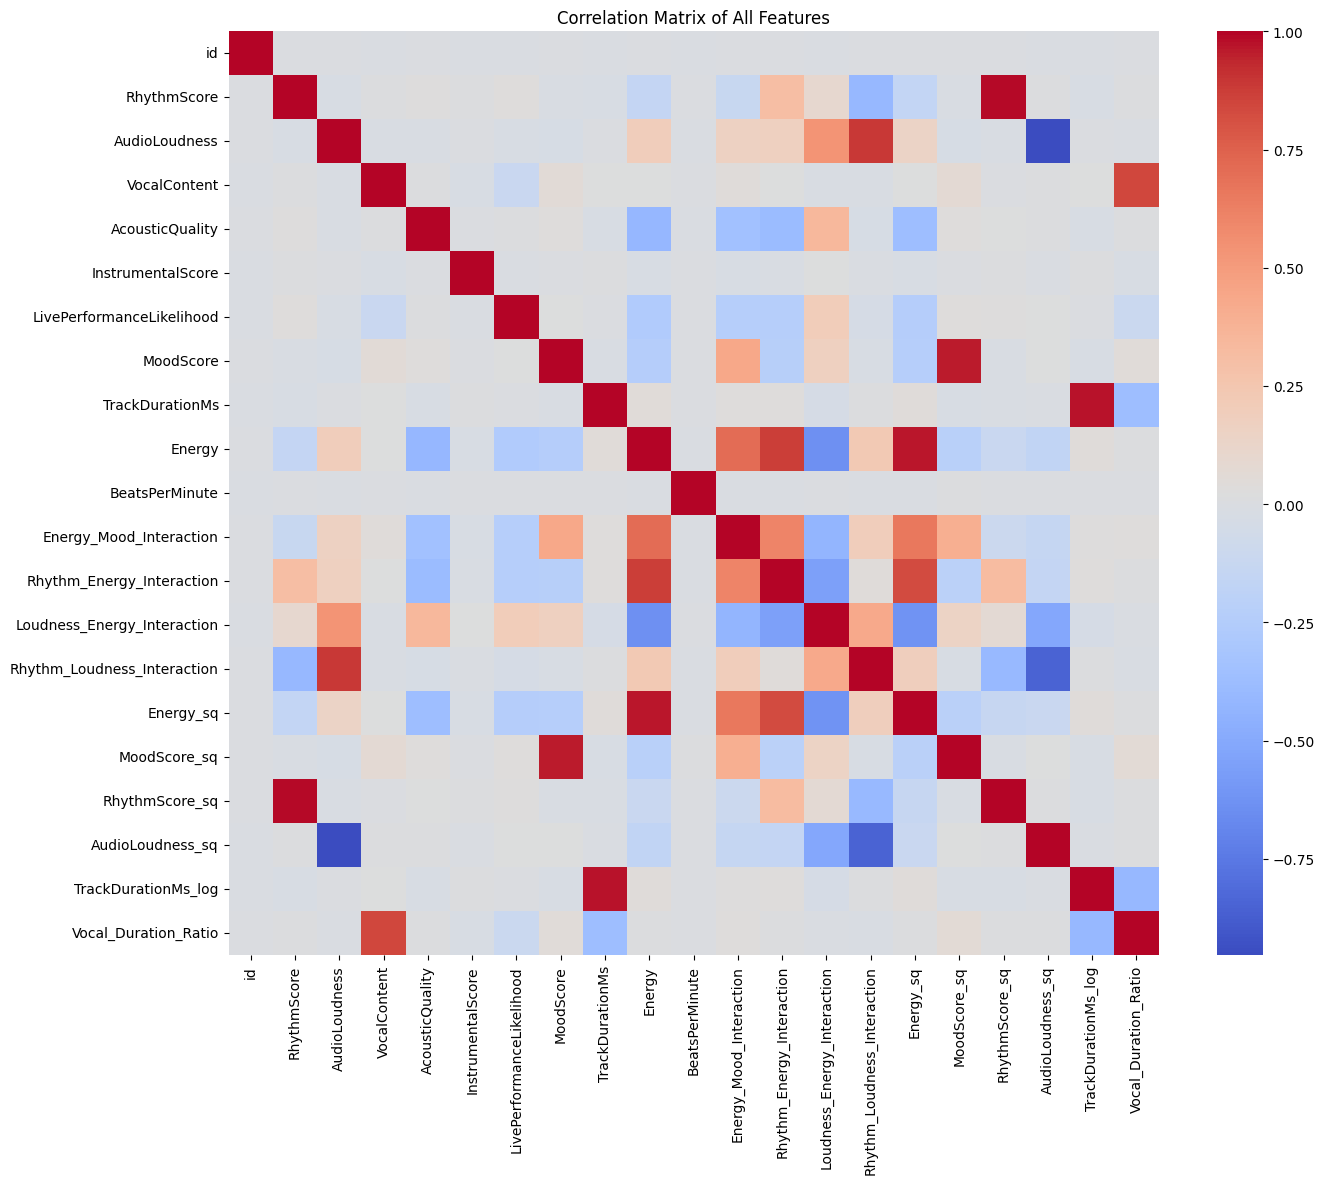

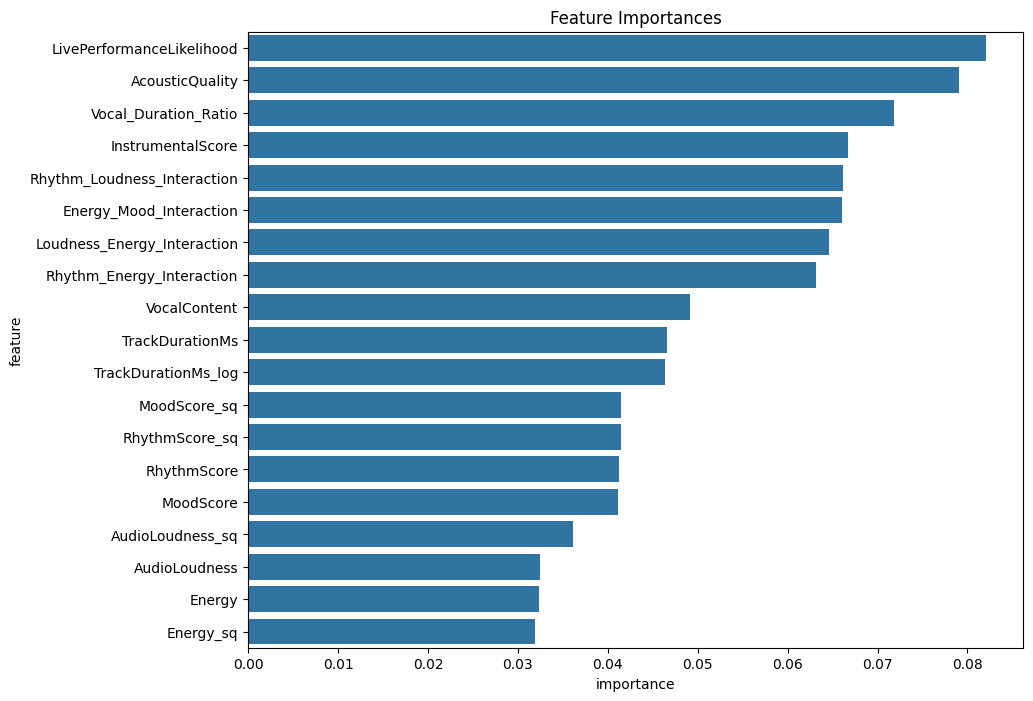

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Correlation Analysis
plt.figure(figsize=(15, 12))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

# Feature Importance Analysis
X = train_df.drop(['id', 'BeatsPerMinute'], axis=1)
y = train_df['BeatsPerMinute']

# Handle potential infinite values from ratio features
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)


model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
model.fit(X, y)

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

## Conclusion
In this notebook, we performed feature engineering to explore new relationships in the data and potentially improve model performance. We created several new features, including interaction terms, polynomial features, transformations, and ratios.

The correlation matrix and feature importance plot provide insights into which of these new features are most promising. The `Loudness_Energy_Interaction` and `Rhythm_Loudness_Interaction` seem to have a noticeable correlation with the target variable. The feature importance plot also highlights some of the new features as being important for the model's predictions.

These new features can now be used in a machine learning model to see if they improve the prediction of `BeatsPerMinute`. Further exploration could involve creating more complex features or using different techniques for feature selection.